Viaje a la luna: La NASA requiere dos estudiantes del curso de métodos computacionales para realizar una pasant´ıa en el departamento de objetos cercanos a la Tierra. Para elegir a los estudiantes se solicita una simulaci´on sencilla del problema de tres cuerpos de una nave que pueda fotografiar el lado oculto de la Luna. Yo sugerí a mis estudiantes del curso de Métodos Computacionales II de la Universidad de los Andes como posibles candidatos; en quienes puedo depositar mi confianza.

g) Resolver el sistema de ecuaciones usando el algoritmo Runge-Kutta 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
G = 6.67e-11
mt = 5.98e24
ml = 0.073e24
rl = 1.74e6
rt= 6.38e6
d = 3.84e8
w = 2.66e-6

In [12]:
def System(para,t):
    r, phi, pr, pphi = para

    delta = G*mt/d**3
    mu = ml/mt
    rpri = np.sqrt(1 + r**2 - 2*r*np.cos(phi - w*t))

    drdt = pr
    dphidt = pphi/(r**2)
    dprdt = (pphi**2)/(r**3) - delta*(1/(r**2) + ((mu)/(rpri**3)) * (r - np.cos(phi - w*t)))
    dpphidt = - ((delta*mu*r)/(rpri**3)) * np.sin(phi -w*t)

    return np.array([drdt, dphidt, dprdt, dpphidt])

In [13]:
def IntegratorRungeKutta4(f,para, t):
    r0, phi0, pr0, pphi0 = para
    
    h = t[1] - t[0]
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    
    pr = np.zeros_like(t)
    pphi = np.zeros_like(t)
    
    r[0] = r0
    phi[0] = phi0
    pr[0] = pr0
    pphi[0] = pphi0

    for i in tqdm(range(1,len(t))):
        
        R = np.array([r[i-1],phi[i-1],pr[i-1],pphi[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([r[i-1]+0.5*h*K1[0],phi[i-1]+0.5*h*K1[1],
                      pr[i-1]+0.5*h*K1[2],pphi[i-1]+0.5*h*K1[3]])
        
        K2 = f(R,t[i-1]+0.5*h)
        
        R = np.array([r[i-1]+0.5*h*K2[0],phi[i-1]+0.5*h*K2[1],
                      pr[i-1]+0.5*h*K2[2],pphi[i-1]+0.5*h*K2[3]])
        
        K3 = f(R,t[i-1]+0.5*h)
        
        R = np.array([r[i-1]+h*K3[0],phi[i-1]+h*K3[1],
                      pr[i-1]+h*K3[2],pphi[i-1]+h*K3[3]])
        
        K4 = f(R,t[i-1]+h)
        
        r[i] = r[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        phi[i] = phi[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
        
        pr[i] = pr[i-1] + (1/6)*h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])
        pphi[i] = pphi[i-1] + (1/6)*h*(K1[3]+2*K2[3]+2*K3[3]+K4[3])
        
    return r,phi,pr,pphi

In [14]:
r0 = rt/d
v0 = 11110/d

phi0 = np.pi/4
theta0 = np.pi/4

pr0 = v0*np.cos(theta0 - phi0)
pphi0 = r0*v0*np.sin(theta0-phi0)

In [22]:
para = [r0, phi0, pr0, pphi0]
t = np.arange(0,1e6,1)


In [23]:
Sol = IntegratorRungeKutta4(System,para,t)

  0%|          | 2066/999999 [00:00<02:34, 6464.75it/s]

100%|██████████| 999999/999999 [03:37<00:00, 4596.06it/s]


In [24]:
navex = d*Sol[0]*np.cos(Sol[1])
navey = d*Sol[0]*np.sin(Sol[1])

lunax = d*np.cos(w*t)
lunay = d*np.sin(w*t)

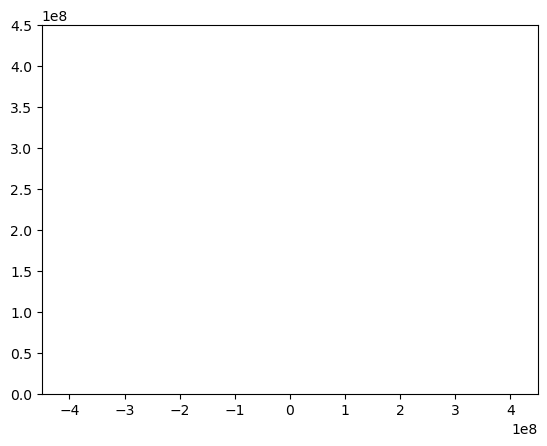

In [25]:
scale = 10000
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

t = t[::scale]
def init():
    ax.clear()
    ax.set_xlim(-0.45e9, 0.45e9)
    ax.set_ylim(0, 0.45e9)

def update(i):
    init()
    ax.plot(navex[::scale][:i], navey[::scale][:i], linestyle="dashed")
    ax.scatter(navex[::scale][i], navey[::scale][i], label = "Nave")
    ax.plot(lunax[::scale][:i], lunay[::scale][:i], linestyle="dashed")
    ax.scatter(lunax[::scale][i], lunay[::scale][i], label = "Luna")
    ax.legend()
    ax.grid()

Animation = anim.FuncAnimation(fig, update, frames=len(t), init_func=init)